In [1]:
!pip install -U fortran-magic
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.9 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [2]:
assert ran_the_first_cell, "Oh noes!"

In [3]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [4]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [5]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [6]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [7]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [8]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [9]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [10]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [11]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [12]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [13]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [14]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers


{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [15]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [16]:
for k in philosophers:
  print('{0} {1}'.format(k, philosophers[k]))

Immanuel Kant
Bertrand Russell
Ludwig Wittgenstein


## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [17]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [18]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [19]:
%%time

matmul(a, b)

CPU times: user 1.68 ms, sys: 89 µs, total: 1.76 ms
Wall time: 4.11 ms


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [20]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [21]:
def multiply_matrices(A, B):
    """
    Multiplies matrix A by matrix B.
    """
    rows_A = len(A)
    cols_B = len(B[0])
    out = [[0 for col in range(cols_B)] for row in range(rows_A)]
    
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    
    return out

In [1]:
%%time
try:
  multiply_matrices(a, b)
except IndexError:
  print('''error''')

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [23]:
def multiply_matrices(A, B):
    """
    Multiplies matrix A by matrix B.
    """
    rows_A = len(A)
    cols_B = len(B[0])

    # Check if matrices can be multiplied
    if len(B) != len(A[0]):
        print('Error: Matrices cannot be multiplied')
        return None

    out = [[0 for col in range(cols_B)] for row in range(rows_A)]
    
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]

    return out

In [2]:
%%time
multiply_matrices(a, b)

**My own example 3 - Chekcing the matrix multiplication compatibility condition  len(A[0]) == len(B)**

In [25]:
def multiply_matrices(A, B):
    """
    Multiplies matrix A by matrix B.
    """
    if len(A[0]) != len(B):
        print('Error: Matrices cannot be multiplied')
        return None

    rows_A = len(A)
    cols_B = len(B[0])
    out = [[0 for col in range(cols_B)] for row in range(rows_A)]
    
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]

    return out

In [26]:
%%time
multiply_matrices(a, b)

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 11.2 µs


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [4]:
def multiply_matrices(A, B):
    """
    Multiplies matrix A by matrix B.
    """
    if len(A[0]) != len(B):
        print('Error: Matrices cannot be multiplied')
        return None
    else:
        rows_A = len(A)
        cols_B = len(B[0])
        out = [[0 for col in range(cols_B)] for row in range(rows_A)]
        
        for i in range(rows_A):
            for j in range(cols_B):
                for k in range(len(A[0])):
                    out[i][j] += A[i][k] * B[k][j]
        return out

In [28]:
%%time
multiply_matrices(a, b)



Imposible Matrix Multiplication -> No compatible dimensions.


CPU times: user 1.25 ms, sys: 0 ns, total: 1.25 ms
Wall time: 3.07 ms


**My own example 5 - Defining A and B that are compatible for multiplcation**

In [3]:
A = [[52, 69, 6, 32],
     [68, 6, 32, 16],
     [68, 6, 13, 16]]

B = [[8, 2, 13],
     [44, 13, 26],
     [15, 16, 21],
     [15, 22, 22]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [5]:
%%time
multiply_matrices(A, B)

CPU times: user 24 µs, sys: 0 ns, total: 24 µs
Wall time: 27.9 µs


[[4022, 1801, 3300], [1528, 1078, 2064], [1243, 774, 1665]]

In [6]:
import random

In [7]:
random.normalvariate(0,1)

-0.027298396715775143

In [8]:
import random

def random_matrix(m, n):
    return [[random.random() for _ in range(n)] for _ in range(m)]

randm = random_matrix(2, 3)
print(randm)

[[0.8091132381876773, 0.48212862050733274, 0.7395293350357519], [0.4752640085624944, 0.21860853718590945, 0.38437005934457735]]


In [34]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 16.4 s, sys: 140 ms, total: 16.6 s
Wall time: 24.4 s


**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [35]:
import time as tm

In [9]:
import time

def mt_multi_time(matA, matB, rep):
    tm_sum = 0

    for i in range(rep):
        st = time.process_time()

        response = multiply_matrices(matA, matB)

        end = time.process_time()

        tm_passed = end - st
        tm_sum += tm_passed

        print('Execution {0} -> {1} seconds'.format(i+1, tm_passed))

    avr = tm_sum / rep
    print('Average Python:', avr, 'seconds')
    return avr

In [10]:
randmA = random_matrix(600, 100)
randmB = random_matrix(100, 600)

avr_py = mt_multi_time(randmA, randmB, 10)

Execution 1 -> 4.509592 seconds
Execution 2 -> 4.4922509999999996 seconds
Execution 3 -> 4.483423 seconds
Execution 4 -> 4.4714279999999995 seconds
Execution 5 -> 4.486090000000001 seconds
Execution 6 -> 4.496662000000001 seconds
Execution 7 -> 4.5537610000000015 seconds
Execution 8 -> 4.4998780000000025 seconds
Execution 9 -> 4.492605000000005 seconds
Execution 10 -> 4.500085000000006 seconds
Average Python: 4.4985775000000015 seconds


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [11]:
import pandas as pd

def add_avr_data(df, lan, avr):
    new_row = {'Language': lan, 'Average (s)': avr}
    return df.append(new_row, ignore_index=True)

In [12]:
language_average = pd.DataFrame({'Language':[],'Average (s)':[]})

In [13]:
language_average = add_avr_data(language_average, 'JS', avr_py)
language_average

/var/folders/ry/wsvp66md48bbs9vftvvq2s9r0000gn/T/ipykernel_68418/2923596731.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(new_row, ignore_index=True)


Language  Average (s)
0       JS     4.498578

**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [41]:
import numpy as np

def mt_multi_time_np(matA, matB, rep):
  tm_sum = 0
  randnpA = np.array(matA)
  randnpB = np.array(matB)

  for i in range(rep):
    st = tm.process_time()

    response = randnpA @ randnpB

    end = tm.process_time()

    tm_passed = end - st
    tm_sum += tm_passed

    print('Execution {0} -> {1} seconds'.format(i+1, tm_passed))

  avr = tm_sum/rep
  print('Average Numpy:', avr, 'seconds')
  return avr

In [42]:
avr_np = mt_multi_time_np(randmA, randmB, 5)

print('\n')
language_average = add_avr_data(language_average, 'Numpy', avr_np)
language_average

Execution 1 -> 0.010205700000000206 seconds
Execution 2 -> 0.015258345000006557 seconds
Execution 3 -> 0.009714597999987973 seconds
Execution 4 -> 0.012639454999998634 seconds
Execution 5 -> 0.005502110000008997 seconds
Execution 6 -> 0.010144335000006777 seconds
Execution 7 -> 0.00571769500001551 seconds
Execution 8 -> 0.009511075999995455 seconds
Execution 9 -> 0.011800957000019707 seconds
Execution 10 -> 0.006188704000010148 seconds
 Average Numpy: 0.009668297500004997 seconds




Language  Average (s)
0   Python    11.039668
1    Numpy     0.009668

In [43]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum([x * y for x, y in zip(xs, ys)])


In [44]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [45]:
list_data = [float(i) for i in range(10000)]
array_data = np.array(list_data)

In [46]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.2 ms, sys: 2 µs, total: 11.2 ms
Wall time: 12.3 ms


333328333350000.0

In [47]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 201 µs, sys: 0 ns, total: 201 µs
Wall time: 249 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [48]:
A = [[10.0, 41.0],
[20.0, 15.0]]

B = [[5.0, 10.0],
[31.0, 62.0]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [49]:
%%fortran
subroutine matmul_fortran(matA, matB, result)
    real, intent(in) :: matA(2,2)
    real, intent(in) :: matB(2,2)
    real, intent(out) :: result(2,2)

    ! Compatible matrix -> # A's columns = # B's rows
  
    do i=1,2
        do j=1,2
            result(i,j) = 0.0 ! Initialize the result
            do k=1,2
                result(i,j) = result(i,j) + matA(i,k) * matB(k,j)
            end do
        end do
    end do
end


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [50]:
anp = np.array(A)
bnp = np.array(B)

In [51]:
%%time
matmul_fortran(anp, bnp)

CPU times: user 1.12 ms, sys: 0 ns, total: 1.12 ms
Wall time: 1.19 ms


array([[1142., 2650.],
       [ 492., 1311.]], dtype=float32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [52]:
%%fortran
subroutine matmul_fortran_rectangle(matA, matB, result)
    real, intent(in) :: matA(600,100)
    real, intent(in) :: matB(600,100)
    real, intent(out) :: result(600,600)

    ! Compatible matrix -> # A's columns = # B's rows

    ! Result matrix has:
    ! Rows = rows of matrix A
    ! Columns = rows of matrix B
  
    do i=1,600
      do j=1,600
        do k=1,100
          result(i,j) = result(i,j) + matA(i,k) * matB(j,k)
        end do
      end do
    end do
end


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [53]:
randmA1 = random_matrix(600, 100)
randmB1 = random_matrix(100, 600)

arnp = np.array(randmA1)
brnp = np.array(randmB1)
matmul_fortran_rectangle(arnp,brnp)

array([[19.566278, 25.105244, 21.536907, ..., 25.14413 , 23.07559 ,
        25.194414],
       [23.327883, 28.490025, 22.041136, ..., 27.702938, 22.663855,
        26.512882],
       [21.820496, 27.430298, 22.233107, ..., 26.146854, 23.39459 ,
        26.870113],
       ...,
       [23.88585 , 30.429577, 24.632925, ..., 29.412481, 26.055672,
        28.99208 ],
       [21.761658, 25.90594 , 19.788158, ..., 24.813044, 23.21437 ,
        23.613415],
       [20.11366 , 24.870798, 19.109507, ..., 23.971487, 21.567753,
        23.446196]], dtype=float32)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [54]:
def mt_multi_time_fortran(matA, matB, rep):
  tm_sum = 0

  for i in range(rep):
    st = tm.process_time()

    matmul_fortran_rectangle(matA,matB)

    end = tm.process_time()

    tm_passed = end - st
    tm_sum += tm_passed

    print('Execution {0} -> {1} seconds'.format(i+1, tm_passed))

  avr = tm_sum/rep
  print('Average Fortran in Python:',avr, 'seconds')
  return avr

In [55]:
avr_fortran_A = mt_multi_time_fortran(randmA, randmB, 10)

print('\n')
language_average = add_avr_data(language_average, 'Fortranmagic', avr_fortran_A)
language_average

Execution 1 -> 0.05391781700001275 seconds
Execution 2 -> 0.0573471700000141 seconds
Execution 3 -> 0.04916569299999196 seconds
Execution 4 -> 0.04918905100001325 seconds
Execution 5 -> 0.05072782199999892 seconds
Execution 6 -> 0.050604775000010704 seconds
Execution 7 -> 0.05286228299999607 seconds
Execution 8 -> 0.051555725999975266 seconds
Execution 9 -> 0.057548013000001674 seconds
Execution 10 -> 0.05107621400000539 seconds
Average Fortran in Python: 0.05239945640000201 seconds




Language  Average (s)
0        Python    11.039668
1         Numpy     0.009668
2  Fortranmagic     0.052399

**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [56]:
%%writefile matmulBig.f
      program matMulBig
        integer :: n,m
        real :: matA(600,100)
        real :: matB(100,600)
        real :: result(600,600)
        real :: average

        ! Result matrix has:
        ! Rows = rows of matrix A
        ! Columns = columns of matrix B

        n = 600
        m = 100

        ! Fill matrix
        call random_number(matA)
        call random_number(matB)

        ! Matrix Multiplication
        average = 0
        call repetitions(n, m, matA, matB, result, 10, average)
        write (*,*) "Average Fortran Program:", average, "seconds"

        ! write to ascii file
        open(unit=1,file="fortran_average.txt",status='replace')
        write(1,*) average
        close(1)

        stop
      end

      subroutine repetitions(n, m, matA, matB, result, rep, average)
        integer, intent(in) :: n, m, rep
        real, intent(inout) :: matA(n,m), matB(m,n)
        real, intent(out) :: result(n,n), average

        real :: start, endTime, time

        do i=1, rep

          time = 0.0
          start = 0.0
          endTime = 0.0

          call cpu_time(start)
          result = matmul(matA, matB)
          call cpu_time(endTime)

          time = endTime - start

          write (*,"(A9, I3, A4, E12.4, A7)") "Execution", i, "->", time, "seconds"

          average = average + time

        end do

        average = average / rep
      end subroutine

Writing matmulBig.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [57]:
!gfortran matmulBig.f -o matmulBig
!./matmulBig

Execution  1  ->  0.4792E-02
Execution  2  ->  0.3921E-02
Execution  3  ->  0.3592E-02
Execution  4  ->  0.3593E-02
Execution  5  ->  0.3662E-02
Execution  6  ->  0.3750E-02
Execution  7  ->  0.3591E-02
Execution  8  ->  0.3675E-02
Execution  9  ->  0.3651E-02
Execution 10  ->  0.3638E-02
 Average Fortran Program:   3.78649984E-03 seconds


**My own example 18 - Adding Fortran average execution time to the data frame**

In [58]:
fortran_file = open('fortran_average.txt','r')
avr_frt = float(fortran_file.readline())
language_average = add_avr_data(language_average, 'Fortran', avr_frt)
language_average

Language  Average (s)
0        Python    11.039668
1         Numpy     0.009668
2  Fortranmagic     0.052399
3       Fortran     0.003786

**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [59]:
%%writefile matmul.c
  #include <stdio.h>
  #include <stdlib.h>
  #include <time.h>

  void fillMatrix(int **mat, int n, int m);
  void matMul(int **matA, int **matB, int **result, int n, int m);
  double multAverage(int **matA, int **matB, int **result, int n, int m, int rep);

  int main(void) {
    FILE *fileAvr;
    int n = 600;
    int m = 100;

    int **pmatA;
    int **pmatB;
    int **presult;
    unsigned int rep = 10;
    double average = 0.0;

    //matrix pointers
    pmatA = (int **) malloc(n * sizeof(int *)); //pointers to each row
    for(int i = 0; i < n; i++){
      pmatA[i] = (int *) malloc(m * sizeof(int)); //pointers to each column
    }

    pmatB = (int **) malloc(m * sizeof(int *));
    for(int i = 0; i < m; i++){
      pmatB[i] = (int *) malloc(n * sizeof(int));
    }

    presult = (int **) malloc(n * sizeof(int *));
    for(int i = 0; i < n; i++){
      presult[i] = (int *) malloc(n * sizeof(int));
    }

    // fill matrix
    fillMatrix(pmatA, n, m);
    fillMatrix(pmatB, m, n);

    //matrix multiplication repetitions
    average = multAverage(pmatA, pmatB, presult, n, m, rep);
    printf("Average in C: %f\n seconds", average);

    //write average into a file
    fileAvr = fopen("c_average.txt", "w");
    fprintf(fileAvr,"%f",average);
    fclose(fileAvr);

    return 0;
  }

  void fillMatrix(int **mat, int n, int m){
    for(int i=0; i<n; i++){
      for(int j=0; j<m; j++){
        mat[i][j] = rand();
      }
    }
    return;
  }

  double multAverage(int **matA, int **matB, int **result, int n, int m, int rep){
    clock_t start, end;
    double average = 0.0;
    double execution = 0.0;

    for(int i=0; i<rep; i++){
      start = clock();
      matMul(matA, matB, result, n, m);
      end = clock();
      execution = ((double)(end - start))/CLOCKS_PER_SEC;
      average += execution;
      printf("Excecution %d -> %f seconds\n",i+1, execution);
    }
    return average/((double) rep);
  }

  void matMul(int **matA, int **matB, int **result, int n, int m){

    //Result matrix has:
    //Rows = rows of matrix A
    //Columns = columns of matrix B

    for(int i=0; i<n; i++){
      for(int j=0; j<n; j++){
        for(int k=0; k<m; k++){
          result[i][j] += matA[i][k] * matB[k][j];
        }
      }
    }
    return;
  }

Writing matmul.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [60]:
!gcc matmul.c -o matmul
!./matmul

Excecution 1 -> 0.219237 seconds
Excecution 2 -> 0.227539 seconds
Excecution 3 -> 0.225752 seconds
Excecution 4 -> 0.209097 seconds
Excecution 5 -> 0.209260 seconds
Excecution 6 -> 0.225278 seconds
Excecution 7 -> 0.212164 seconds
Excecution 8 -> 0.211441 seconds
Excecution 9 -> 0.215622 seconds
Excecution 10 -> 0.214736 seconds
Average in C: 0.217013
 seconds

**My own example 21 - Adding c average execution time to the data frame**

In [61]:
c_file = open('c_average.txt','r')
avr_c = float(c_file.readline())
language_average = add_avr_data(language_average, 'C', avr_c)
language_average

Language  Average (s)
0        Python    11.039668
1         Numpy     0.009668
2  Fortranmagic     0.052399
3       Fortran     0.003786
4             C     0.217013

**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [62]:
%%writefile matmul.cpp
  #include <stdio.h>
  #include <stdlib.h>
  #include <time.h>
  #include <iostream>

  using namespace std;

  void fillMatrix(int **mat, int n, int m);
  void matMul(int **matA, int **matB, int **result, int n, int m);
  double multAverage(int **matA, int **matB, int **result, int n, int m, int rep);

  int main(void) {
  FILE *fileAvr;
  int n = 600;
  int m = 100;

  int **pmatA;
  int **pmatB;
  int **presult;
  unsigned int rep = 10;
  double average = 0.0;

  // matrix pointers
  pmatA = (int **)malloc(n * sizeof(int *)); // pointers to each row
  for (int i = 0; i < n; i++) {
  pmatA[i] = (int *)malloc(m * sizeof(int)); // pointers to each column
  }

  pmatB = (int **)malloc(m * sizeof(int *));
  for (int i = 0; i < m; i++) {
  pmatB[i] = (int *)malloc(n * sizeof(int));
  }

  presult = (int **)malloc(n * sizeof(int *));
  for (int i = 0; i < n; i++) {
  presult[i] = (int *)malloc(n * sizeof(int));
  }

  // fill matrix
  fillMatrix(pmatA, n, m);
  fillMatrix(pmatB, m, n);

  // matrix multiplication repetitions
  average = multAverage(pmatA, pmatB, presult, n, m, rep);
  printf("Average in C++: %f seconds\n", average);

  // write average into a file
  fileAvr = fopen("c_plus_average.txt", "w");
  fprintf(fileAvr, "%f", average);
  fclose(fileAvr);

  return 0;
  }

  void fillMatrix(int **mat, int n, int m) {
  for (int i = 0; i < n; i++) {
  for (int j = 0; j < m; j++) {
  mat[i][j] = rand();
  }
  }
  return;
  }

  double multAverage(int **matA, int **matB, int **result, int n, int m, int rep) {
  clock_t start, end;
  double average = 0.0;
  double execution = 0.0;

  for (int i = 0; i < rep; i++) {
  start = clock();
  matMul(matA, matB, result, n, m);
  end = clock();
  execution = ((double)(end - start)) / CLOCKS_PER_SEC;
  average += execution;
  printf("Execution %d -> %f seconds\n", i + 1, execution);
  }
  return average / ((double)rep);
  }

  void matMul(int **matA, int **matB, int **result, int n, int m) {

  // Result matrix has:
  // Rows = rows of matrix A
  // Columns = columns of matrix B

  for (int i = 0; i < n; i++) {
  for (int j = 0; j < n; j++) {
  for (int k = 0; k < m; k++) {
  result[i][j] += matA[i][k] * matB[k][j];
  }
  }
  }
  return;
  }

Writing matmul.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [63]:
!g++ matmul.cpp -o matmul
!./matmul

Excecution 1 -> 0.224653 seconds
Excecution 2 -> 0.212790 seconds
Excecution 3 -> 0.212654 seconds
Excecution 4 -> 0.210190 seconds
Excecution 5 -> 0.204679 seconds
Excecution 6 -> 0.220069 seconds
Excecution 7 -> 0.210419 seconds
Excecution 8 -> 0.214268 seconds
Excecution 9 -> 0.207971 seconds
Excecution 10 -> 0.206314 seconds
Average in C++: 0.212401 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [64]:
c_plus_file = open('c_plus_average.txt','r')
avr_c_plus = float(c_plus_file.readline())
language_average = add_avr_data(language_average, 'C++', avr_c_plus)
language_average

Language  Average (s)
0        Python    11.039668
1         Numpy     0.009668
2  Fortranmagic     0.052399
3       Fortran     0.003786
4             C     0.217013
5           C++     0.212401

**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [65]:
%%writefile MatMul.java

  import java.util.Random;
  import java.io.FileWriter;
  import java.io.IOException;

  class MatMul {

    public static void main(String[] args) {
      int n = 600;
      int m = 100;
      int rep = 10;

      int[][] matA = new int[n][m];
      int[][] matB = new int[m][n];
      int[][] result = new int[n][n];

      //Fill matrix
      fillMatrix(matA, n, m);
      fillMatrix(matB, m, n);

      //matrix multiplication repetitions
      double average = multAverage(matA, matB, result, n, m, rep);
      System.out.println("Average in Java: " + average + " seconds");

      //write average into a file
      try {
          FileWriter fileAvr = new FileWriter("java_average.txt");
          fileAvr.write(Double.toString(average));
          fileAvr.close();
      }
      catch (IOException e) {
          e.printStackTrace();
      }

    }

    static double multAverage(int[][] matA, int[][] matB, int[][] result, int n, int m, int rep){
      long average = 0;

      for(int i=0; i<rep; i++){
        long start = System.currentTimeMillis();
        matMultiplication(matA, matB, result, n, m);
        long end = System.currentTimeMillis();

        long execution = end - start; //in milliseconds
        average += execution;
        System.out.println("Execution " + (i+1) + " -> " + ((double)execution/1000) + " seconds");
      }

      average = average/rep; //in milliseconds
      double avr = (double)average/1000;

      return avr;
    }

    static void matMultiplication(int[][] matA, int[][] matB, int[][] result, int n, int m){
      //Arrays are passed by reference in Java by default

      //Result matrix has:
      //Rows = rows of matrix A
      //Columns = columns of matrix B

      for(int i=0; i<n; i++){
        for(int j=0; j<n; j++){
          for(int k=0; k<m; k++){
            result[i][j] += matA[i][k] * matB[k][j];
          }
        }
      }
    }

    static void fillMatrix(int[][] mat, int n, int m){
      //Arrays are passed by reference in Java by default

      Random random = new Random();

      for (int i = 0; i < n; i++) {
        for (int j = 0; j < m; j++) {
          mat[i][j] = random.nextInt(10000);
        }
      }
    }
  }

Writing MatMul.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [66]:
!javac MatMul.java

In [67]:
!java MatMul

Execution 1 -> 0.169 seconds
Execution 2 -> 0.137 seconds
Execution 3 -> 0.091 seconds
Execution 4 -> 0.081 seconds
Execution 5 -> 0.091 seconds
Execution 6 -> 0.086 seconds
Execution 7 -> 0.095 seconds
Execution 8 -> 0.095 seconds
Execution 9 -> 0.096 seconds
Execution 10 -> 0.094 seconds
Average in Java: 0.103 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [68]:
java_file = open('java_average.txt','r')
avr_java = float(java_file.readline())
language_average = add_avr_data(language_average, 'Java', avr_java)
language_average

Language  Average (s)
0        Python    11.039668
1         Numpy     0.009668
2  Fortranmagic     0.052399
3       Fortran     0.003786
4             C     0.217013
5           C++     0.212401
6          Java     0.103000

**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [69]:
%%writefile matMul.js

  const fs = require("fs");
  const {performance} = require('perf_hooks');

  const matMultiplication = (matA, matB, result, n, m)=>{
    //Arrays are passed by reference by default

    //Result matrix has:
    //Rows = rows of matrix A
    //Columns = columns of matrix B

    for(let i=0; i<n; i++){
      for(let j=0; j<n; j++){
        for(let k=0; k<m; k++){
          result[i][j] += matA[i][k] * matB[k][j];
        }
      }
    }
  }

  const multAverage = (matA, matB, result, n, m, rep) => {
    let average = 0;
    let start = 0;
    let end = 0;
    let execution = 0;

    for (let i = 0; i < rep; i++) {
      start = performance.now();
      matMultiplication(matA, matB, result, n, m);
      end = performance.now();

      execution = end - start; //in milliseconds
      average += execution;
      console.log(`Execution ${i+1} -> ${execution/1000} seconds`);
    }

    average /= rep;
    return average/1000;
  }

  const randomNumber = (mat, n, m) => {
    const min = 1;
    const max = 100000;
    return Math.floor(Math.random() * (max - min + 1)) + min
  }
  
  const matMul = () => {
    const n = 600;
    const m = 100;
    const rep = 10;

    //Fil matrix
    const matA = new Array(n).fill(new Array(m).fill(randomNumber()));
    const matB = new Array(m).fill(new Array(n).fill(randomNumber()));
    const result = new Array(n).fill(new Array(n).fill(0));

    //matrix multiplication repetitions
    const average = multAverage(matA, matB, result, n, m, rep);

    console.log(`Average Javascript: ${average} seconds`);

    //write average into file
    fs.writeFile("js_average.txt", `${average}`, function(err) {
        if (err) {
            console.log("Error writing to file:", err);
        }
    });
  }

  matMul();

Writing matMul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [70]:
!node matMul.js

Execution 1 -> 0.5258098760000139 seconds
Execution 2 -> 0.3253665620000102 seconds
Execution 3 -> 0.27506286700000054 seconds
Execution 4 -> 0.2748471759999811 seconds
Execution 5 -> 0.28301043799999753 seconds
Execution 6 -> 0.28955148099997313 seconds
Execution 7 -> 0.2734972120000166 seconds
Execution 8 -> 0.27746700200001945 seconds
Execution 9 -> 0.29455459700000935 seconds
Execution 10 -> 0.2723928920000035 seconds
Average Javascript: 0.30915601030000256 seconds


**My own example 30 - Adding Javascript average execution time to the data frame**

In [71]:
js_file = open('js_average.txt','r')
avr_js = float(js_file.readline())
language_average = add_avr_data(language_average, 'Javascript', avr_js)
language_average

Language  Average (s)
0        Python    11.039668
1         Numpy     0.009668
2  Fortranmagic     0.052399
3       Fortran     0.003786
4             C     0.217013
5           C++     0.212401
6          Java     0.103000
7    Javascript     0.309156

**My own example 31 - Finding the minimun average execution time in the data frame**

In [72]:
min_time_Language = language_average['Average (s)'].min();
min_time_Language

0.00378649984

**My own example 32 - Adding the Speed factor columne to the data frame**

In [73]:
speed = []
for i in range(len(language_average)):
  speed.append(language_average['Average (s)'].iloc[i]/min_time_Language)
language_average['Speed Factor'] = speed

**My own example 33 - Sorting the the data frame by average execution time**

In [74]:
language_average.sort_values(by=['Average (s)'], inplace=True)
language_average

Language  Average (s)  Speed Factor
3       Fortran     0.003786      1.000000
1         Numpy     0.009668      2.553360
2  Fortranmagic     0.052399     13.838494
6          Java     0.103000     27.201903
5           C++     0.212401     56.094285
4             C     0.217013     57.312296
7    Javascript     0.309156     81.646910
0        Python    11.039668   2915.533703

## Why is the Python Version so Much Slower?

In [75]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [76]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [77]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [78]:
data + data

array([2, 4, 6, 8])

In [79]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.48 ms, sys: 993 µs, total: 2.48 ms
Wall time: 1.99 ms


333328333350000.0

In [80]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 400 µs, sys: 3 µs, total: 403 µs
Wall time: 476 µs


333328333350000.0

In [81]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 244 µs, sys: 2 µs, total: 246 µs
Wall time: 194 µs


333328333350000.0

In [82]:
# Numpy won't allow us to write a string into an int array.
print("ValueError: invalid literal for int() with base 10: 'foo' -> data[0] = 'foo'") #data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo' -> data[0] = 'foo'


In [83]:
# We also can't grow an array once it's created.
print("AttributeError: 'numpy.ndarray' object has no attribute 'append' -> data.append(3)")# data.append(3)

AttributeError: 'numpy.ndarray' object has no attribute 'append' -> data.append(3)


In [84]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [85]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [86]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [87]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [88]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [89]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [90]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [91]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [92]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [93]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [94]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [95]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [96]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [97]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [98]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [99]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [100]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [101]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [102]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [103]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [104]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [105]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [106]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [107]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [108]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [109]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [110]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [111]:
variance(np.random.standard_normal(1000))

0.977542250347684

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [112]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [113]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [114]:
data.mean()

14.5

In [115]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [116]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [117]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [118]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [119]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [120]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [121]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [122]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [123]:
# ... or by label.
s.loc['a']

1

In [124]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [125]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [126]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [127]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [128]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [129]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [130]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [131]:
# Most real datasets are read in from an external file format.
url = 'https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/AAPL.csv'
aapl = pd.read_csv(url, parse_dates=['Date'], index_col='Date') #aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

Adj Close      Close       High        Low       Open       Volume
Date                                                                          
2010-01-04  27.613066  30.572857  30.642857  30.340000  30.490000  123432400.0
2010-01-05  27.660807  30.625713  30.798571  30.464285  30.657143  150476200.0
2010-01-06  27.220825  30.138571  30.747143  30.107143  30.625713  138040000.0
2010-01-07  27.170504  30.082857  30.285715  29.864286  30.250000  119282800.0
2010-01-08  27.351143  30.282858  30.285715  29.865715  30.042856  111902700.0

In [132]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

Adj Close      Close
Date                            
2010-01-04  27.613066  30.572857
2010-01-05  27.660807  30.625713

In [133]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

Close       Volume
Date                              
2010-02-01  27.818571  187469100.0
2010-02-02  27.980000  174585600.0
2010-02-03  28.461428  153832000.0
2010-02-04  27.435715  189413000.0

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

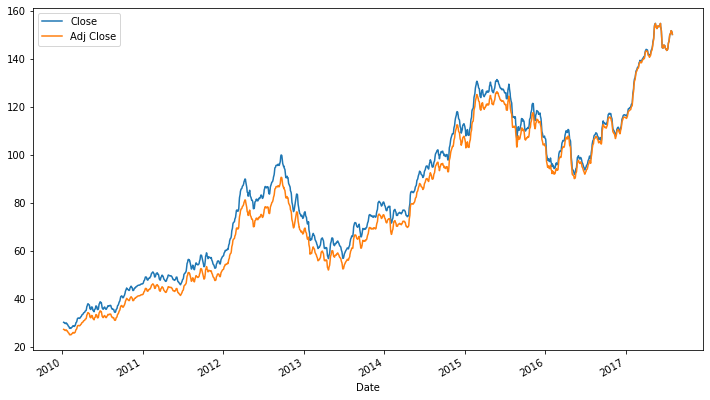

In [134]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

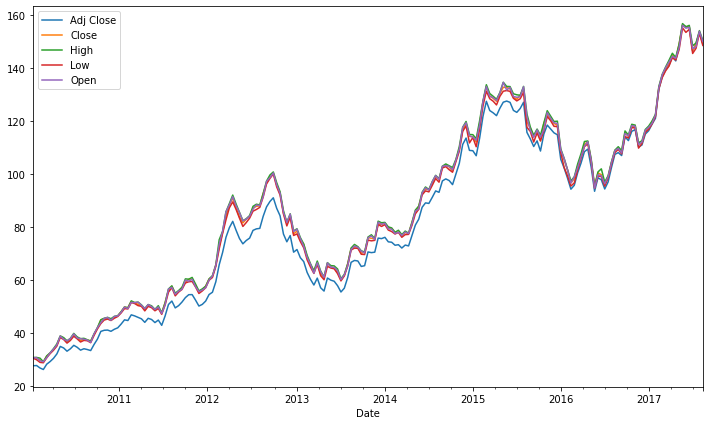

In [135]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

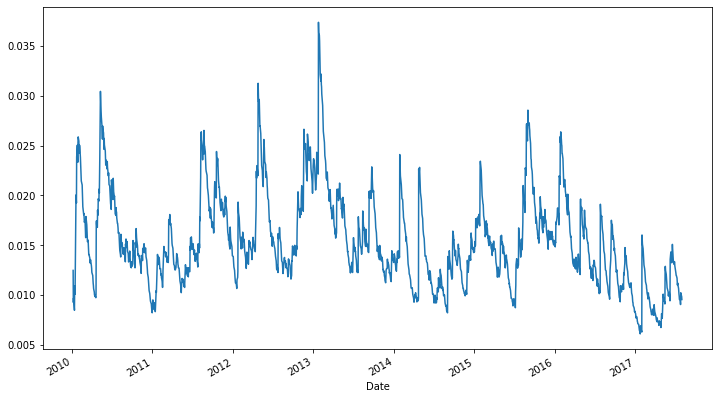

In [136]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [137]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [138]:
avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-137-74fdf899ad9d>:54: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


Date     Region Variety  Organic  Number of Stores  \
0 2014-01-03 00:00:00+00:00   NATIONAL    HASS    False              9184   
1 2014-01-03 00:00:00+00:00   NATIONAL    HASS     True               872   
2 2014-01-03 00:00:00+00:00  NORTHEAST    HASS    False              1449   
3 2014-01-03 00:00:00+00:00  NORTHEAST    HASS     True                66   
4 2014-01-03 00:00:00+00:00  SOUTHEAST    HASS    False              2286   

   Weighted Avg Price  Low Price  High Price  
0                0.93        NaN         NaN  
1                1.44        NaN         NaN  
2                1.08        0.5        1.67  
3                1.54        1.5        2.00  
4                0.98        0.5        1.99

In [139]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

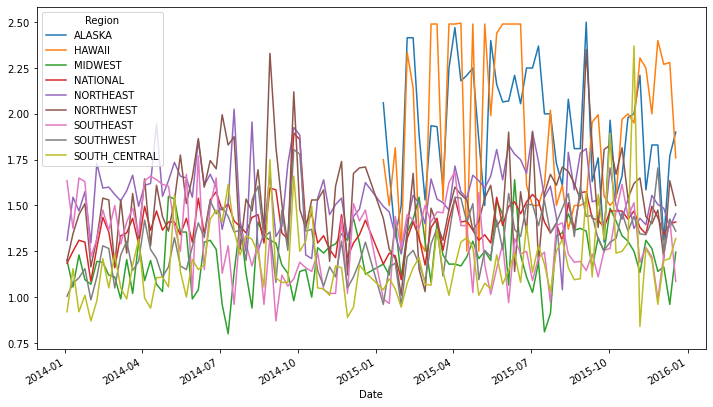

In [140]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [141]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

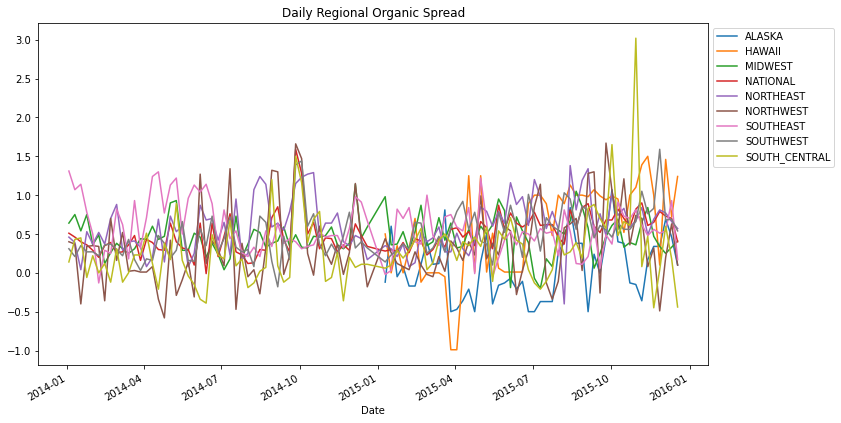

In [142]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [143]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region           ALASKA    HAWAII   MIDWEST  NATIONAL  NORTHEAST  NORTHWEST  \
Region                                                                        
ALASKA         1.000000  0.202723  0.175251  0.007844   0.051049   0.087575   
HAWAII         0.202723  1.000000 -0.021116  0.373914   0.247171   0.341155   
MIDWEST        0.175251 -0.021116  1.000000  0.062595  -0.010213  -0.043783   
NATIONAL       0.007844  0.373914  0.062595  1.000000   0.502035   0.579102   
NORTHEAST      0.051049  0.247171 -0.010213  0.502035   1.000000   0.242039   
NORTHWEST      0.087575  0.341155 -0.043783  0.579102   0.242039   1.000000   
SOUTHEAST      0.129079  0.019388  0.047437 -0.040539  -0.236225  -0.032306   
SOUTHWEST     -0.070868  0.159192 -0.059128  0.635006   0.360389   0.165992   
SOUTH_CENTRAL  0.161624  0.092632  0.068902  0.486524   0.149881   0.349935   

Region         SOUTHEAST  SOUTHWEST  SOUTH_CENTRAL  
Region                                              
ALASKA          0.129079  -0.070868       0.161624  
HAWAII          0.019388   0.159192       0.092632  
MIDWEST         0.047437  -0.059128       0.068902  
NATIONAL       -0.040539   0.635006       0.486524  
NORTHEAST      -0.236225   0.360389       0.149881  
NORTHWEST      -0.032306   0.165992       0.349935  
SOUTHEAST       1.000000  -0.167631      -0.021176  
SOUTHWEST      -0.167631   1.000000       0.254504  
SOUTH_CENTRAL  -0.021176   0.254504       1.000000

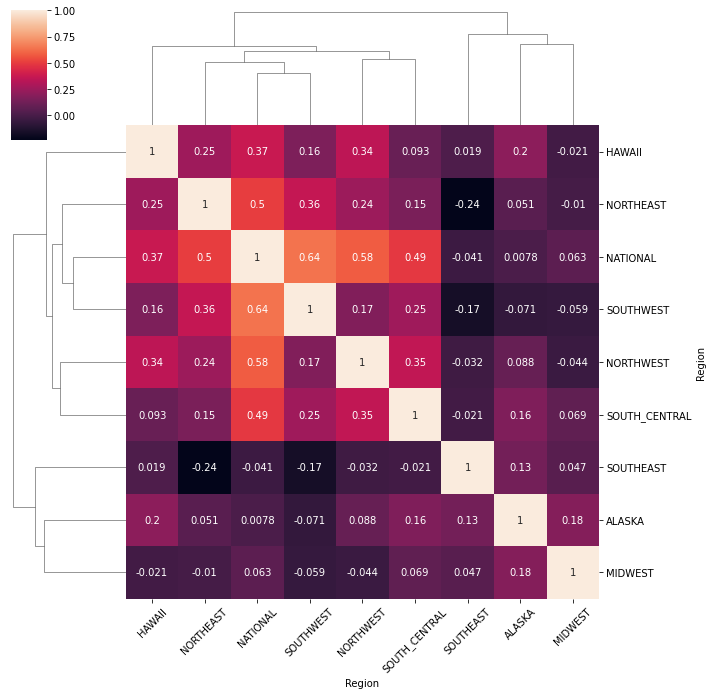

In [144]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**My own example 34 - Analysing real colombian data**

***Biggest enterprises in Colombia 2017 - 2018***

The database used to final example has financial information of the 1,000 largest companies in 2018 and their comparative year 2017. The enterprises analysed are supervised by the Superintendence of Companies, Financial Superintendence, National Health Superintendence, Superintendence of Public Services and Superintendence of Surveillance and Private Security.


You can find database going through the following website:
https://www.datos.gov.co/Econom-a-y-Finanzas/1000-Empresas-mas-grandes-del-pa-s/8hn7-rpp8

In [145]:
import requests

#Getting data from "Datos Colombia" Api and save it to a pandas dataframe
response = requests.get('https://www.datos.gov.co/resource/8hn7-rpp8.json')
companies = pd.DataFrame(response.json())

#Changing Columns Name
companies = companies.rename(columns={'razon_social' :'Company Name','supervisor': 'Supervisor', 'regi_n':'Region', 'departamento_domicilio':'Department Address', 'ciudad_domicilio':'City Address', 'ciiu': 'CIIU', 'macrosector':'Macrosector', 'ingresos_operacionales_2018':'Operating income 2018', 'ganancia_perdida_2018':'Lost Profit 2018', 'total_activos_2018' :'Total Assets 2018', 'total_pasivos_2018': 'Total liabilities 2018', 'total_patrimonio_2018': 'Heritage 2018','ingresos_operacionales_2017': 'Operating income 2017', 'ganancia_perdida_2017':'Lost Profit 2017', 'total_activos_2017' :'Total Assets 2017', 'total_pasivos_2017': 'Total liabilities 2017', 'total_patrimonio_2017': 'Heritage 2017', 'grupo_en_niif':'NIIF'})
companies

no        nit                       Company Name       Supervisor  \
0       1  899999068                      ECOPETROL S.A  SUPERFINANCIERA   
1       2  830095213           ORGANIZACIÓN TERPEL S.A.  SUPERFINANCIERA   
2       3  900112515      REFINERIA DE CARTAGENA S.A.S.  SUPERSOCIEDADES   
3       4  890900608                ALMACENES EXITO S A  SUPERFINANCIERA   
4       5  890904996  EMPRESAS PÚBLICAS DE MEDELLÍN ESP   SUPERSERVICIOS   
..    ...        ...                                ...              ...   
995   996  830041054               Diebold Colombia S.A  SUPERSOCIEDADES   
996   997  860002274                          ETERNA SA  SUPERSOCIEDADES   
997   998  800000750      Petrosantander (Colombia) Inc  SUPERSOCIEDADES   
998   999  890911878      CARIBEMOTOR DE MEDELLIS S.A.S  SUPERSOCIEDADES   
999  1000  890200656              PALMAS DEL CESAR S.A.  SUPERSOCIEDADES   

                    Region Department Address             City Address  \
0    Bogotá - Cundinamarca        BOGOTA D.C.  BOGOTA-D.C.-BOGOTA D.C.   
1    Bogotá - Cundinamarca        BOGOTA D.C.  BOGOTA-D.C.-BOGOTA D.C.   
2          Costa Atlántica            BOLIVAR        CARTAGENA-BOLIVAR   
3                Antioquia          ANTIOQUIA       ENVIGADO-ANTIOQUIA   
4                Antioquia          ANTIOQUIA       MEDELLIN-ANTIOQUIA   
..                     ...                ...                      ...   
995  Bogotá - Cundinamarca        BOGOTA D.C.  BOGOTA-D.C.-BOGOTA D.C.   
996  Bogotá - Cundinamarca        BOGOTA D.C.  BOGOTA-D.C.-BOGOTA D.C.   
997  Bogotá - Cundinamarca        BOGOTA D.C.  BOGOTA-D.C.-BOGOTA D.C.   
998              Antioquia          ANTIOQUIA       MEDELLIN-ANTIOQUIA   
999       Centro - Oriente          SANTANDER    BUCARAMANGA-SANTANDER   

                                                  CIIU           Macrosector  \
0                 B0610 - Extracción de petróleo crudo  MINERO-HIDROCARBUROS   
1    G4661 - Comercio al por mayor de combustibles ...              COMERCIO   
2    C1921 - Fabricación de productos de la refinac...           MANUFACTURA   
3    G4711 - Comercio al por menor en establecimien...              COMERCIO   
4             D3513- Dsitribución de energía electrica             SERVICIOS   
..                                                 ...                   ...   
995  S9511 - Mantenimiento y reparación de computad...             SERVICIOS   
996  C2219 - Fabricación de formas básicas de cauch...           MANUFACTURA   
997               B0610 - Extracción de petróleo crudo  MINERO-HIDROCARBUROS   
998   G4511 - Comercio de vehículos automotores nuevos              COMERCIO   
999  C1030 - Elaboración de aceites y grasas de ori...           MANUFACTURA   

    Operating income 2018 Lost Profit 2018 Total Assets 2018  \
0          62579849000.00   11556405000.00   113761823000.00   
1          14879440281.00     133741350.00     5488095686.00   
2          12919431000.00    -802449716.00    27881794581.00   
3          11444486000.00     279403000.00    15663349000.00   
4           8966811000.00    2344822000.00    45595544000.00   
..                    ...              ...               ...   
995          134550721.00       9634217.00       95397203.00   
996          134491689.00       1703162.00      207154183.00   
997          134466854.00      35301665.00      360630669.00   
998          134455953.00        430144.00       78793544.00   
999          134354596.00      -2917108.00      130799575.00   

    Total liabilities 2018   Heritage 2018 Operating income 2017  \
0           56548216000.00  57213607000.00        49687082000.00   
1            3525498461.00   1962597225.00        12493256560.00   
2            9121543502.00  18760251079.00         9150339475.00   
3            8013609000.00   7649740000.00        11250922000.00   
4           22990219000.00  22605325000.00         7927149000.00   
..                     ...             ...                   ...   

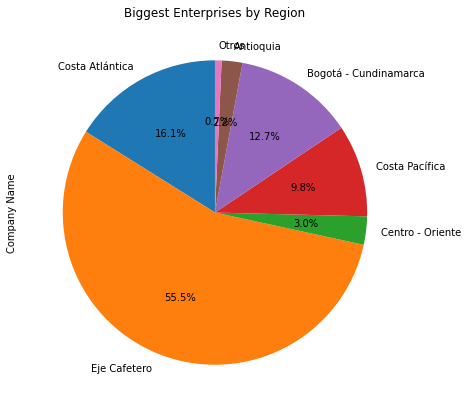

In [146]:
# What's the regional amount of biggest enterprises?
r = companies.loc[:, ['Region']]
region_values = set(r.values.flatten());

companies.groupby(['Region'])['Company Name'].count().plot(kind='pie', y='values', labels=region_values, autopct='%1.1f%%', startangle=90);

plt.title('Biggest Enterprises by Region');

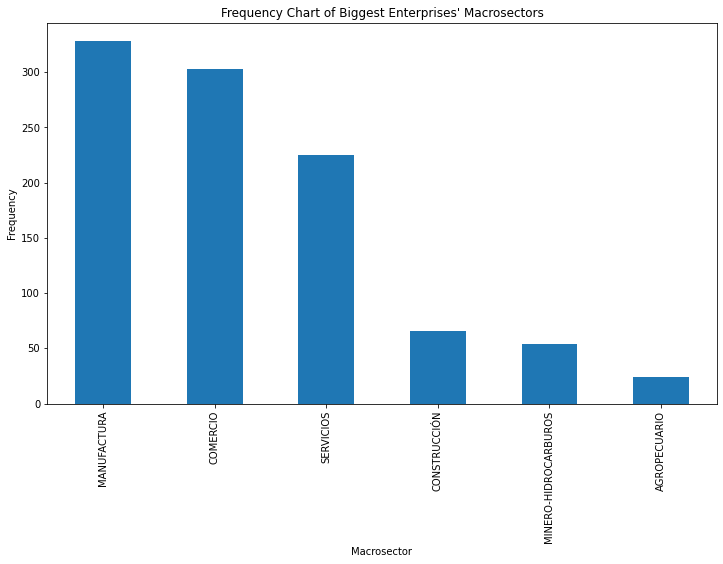

In [147]:
#Which is the Macrosector with most of the biggest enterprises?
companies['Macrosector'].value_counts().plot(kind='bar');

plt.xlabel('Macrosector')
plt.ylabel('Frequency')
plt.title("Frequency Chart of Biggest Enterprises' Macrosectors");

In [148]:
#Heritage change by year
def heritage_percentage(h_2018, h_2017):
    '''Percentage of change of heritage 2018 - 2017'''
    return ((float(h_2018) - float(h_2017))/ float(h_2018))*100

def dataframe_heritage(df):
    change = []
    for i in range(len(df)):
      h_2018 = df['Heritage 2018'].iloc[i]
      h_2017 = df['Heritage 2017'].iloc[i]
      change.append(heritage_percentage(h_2018, h_2017))

    df['Heritage Change (%)'] = change
    return df

In [149]:
companies_heritage = companies.loc[:, ['Company Name', 'Heritage 2018', 'Heritage 2017']]
companies_heritage = dataframe_heritage(companies_heritage)
companies_heritage

Company Name   Heritage 2018   Heritage 2017  \
0                        ECOPETROL S.A  57213607000.00  47898631000.00   
1             ORGANIZACIÓN TERPEL S.A.   1962597225.00   1677263030.00   
2        REFINERIA DE CARTAGENA S.A.S.  18760251079.00  18167264519.00   
3                  ALMACENES EXITO S A   7649740000.00   7839568000.00   
4    EMPRESAS PÚBLICAS DE MEDELLÍN ESP  22605325000.00  21497981000.00   
..                                 ...             ...             ...   
995               Diebold Colombia S.A     40240267.00     30606050.00   
996                          ETERNA SA    104835347.00     97752644.00   
997      Petrosantander (Colombia) Inc    214403089.00    202668951.00   
998      CARIBEMOTOR DE MEDELLIS S.A.S     53590006.00     53159862.00   
999              PALMAS DEL CESAR S.A.     76604080.00     80483876.00   

     Heritage Change (%)  
0              16.281050  
1              14.538602  
2               3.160867  
3              -2.481496  
4               4.898598  
..                   ...  
995            23.941732  
996             6.756026  
997             5.472933  
998             0.802657  
999            -5.064738  

[1000 rows x 4 columns]

In [150]:
#First five biggest companies oredered by current reason - 2018
def current_reason(asset, liabilities):
    '''Current reason defines the company capacity for accomplish their financial obligations'''
    return (float(asset)/ float(liabilities))*100

def dataframe_current_reason(df, year):
    change = []
    for i in range(len(df)):
      assets = df['Total Assets {0}'.format(year)].iloc[i]
      liabilities = df['Total liabilities {0}'.format(year)].iloc[i]
      change.append(current_reason(assets, liabilities))

    df['Current Reason {0} (%)'.format(year)] = change
    return df

In [151]:
companies_current_2018 = companies.loc[:, ['Company Name', 'Total Assets 2018', 'Total liabilities 2018']]
companies_current_2018 = dataframe_current_reason(companies_current_2018, '2018')
companies_current_2018.sort_values(by=['Current Reason 2018 (%)'], inplace=True)
companies_current_2018.head()

Company Name Total Assets 2018 Total liabilities 2018  \
308      CCF COMFACOR       37576615.08           435687436.83   
363         EMDISALUD       99081334.14           495086064.28   
294         CCF HUILA       64944809.51           240249295.77   
902  CAPRESOCA E.P.S.       28493872.53           101594238.23   
95       ASMET S.A.S.      317631398.69          1016799737.88   

     Current Reason 2018 (%)  
308                 8.624673  
363                20.012952  
294                27.032258  
902                28.046741  
95                 31.238344

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!